# PCA Practice

## Concepts

#### Give at least two reasons why one might use PCA.  Be sure to include discussion of what problem PCA solves and how.

In [ ]:
#Your answers here
"""
If you want to reduce dimensionality, you use PCA (reduce dimensionality enough to get similar results 
as using all the features)

PCA gets rid of multicolinearity.
"""

In [1]:
# Run as-is
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import pickle as pkl

with open('test_obj/X.pkl', 'rb') as f:
    X = pkl.load(f)

with open('test_obj/y.pkl', 'rb') as f:
    y = pkl.load(f)  

from test_scripts.test_class import Test
test = Test()

## Application

### Data Exploration

- Turn `X` (a np array of features) into a dataframe.  
    - How many features are there? 
    - How many observations are there?

- Turn `y` (a np array of the target) into a df.
    - Are the observations in y continuous or discreet?
    - Would prediction of y be a regression or classification problem?

In [23]:
# your work here
import pandas as pd

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X.shape

(10000, 200)

In [24]:
print(f'# of Features: {X.shape[1]}')
print(f'# of Observations: {X.shape[0]}')

# of Features: 200
# of Observations: 10000


In [18]:
y[0].unique()

array([0, 1], dtype=int64)

In [20]:
# y is discret
# classification

### PCA Exploration

#### Run the following steps
- Train Test Split, `random_state` = 1

- Scale w/ StandardScaler

- For the full PCA transformation (ie, w/o specifying `n_components` number)
on `X_train`, store the explained variance ratio for each component 
in `evr`

- Graph `evr`

- Re-graph the first few components in order to focus on them (you'll see why)

How many principal components does it look like we should choose?

In [6]:
#Your work here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [25]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [26]:
evr = pca.explained_variance_ratio_
evr

array([1.56178567e-02, 1.35534066e-02, 1.20208922e-02, 9.68228404e-03,
       8.55928752e-03, 6.89396024e-03, 6.62468903e-03, 6.59802224e-03,
       6.56557124e-03, 6.50142362e-03, 6.45835788e-03, 6.43613267e-03,
       6.41137914e-03, 6.39310368e-03, 6.35646590e-03, 6.32928320e-03,
       6.32004944e-03, 6.27071955e-03, 6.23674981e-03, 6.22895225e-03,
       6.18636128e-03, 6.16298948e-03, 6.15108933e-03, 6.14465353e-03,
       6.13074245e-03, 6.07427761e-03, 6.05770700e-03, 6.04406033e-03,
       6.03369450e-03, 6.00723833e-03, 5.99626311e-03, 5.96081732e-03,
       5.93048706e-03, 5.90868512e-03, 5.89904272e-03, 5.89624642e-03,
       5.87600137e-03, 5.87047987e-03, 5.85071002e-03, 5.83029831e-03,
       5.80419492e-03, 5.77786869e-03, 5.76093287e-03, 5.75349634e-03,
       5.72898333e-03, 5.72038169e-03, 5.70015984e-03, 5.66751819e-03,
       5.65842397e-03, 5.64936694e-03, 5.64157610e-03, 5.61077344e-03,
       5.59465408e-03, 5.58266796e-03, 5.56968627e-03, 5.54746633e-03,
      

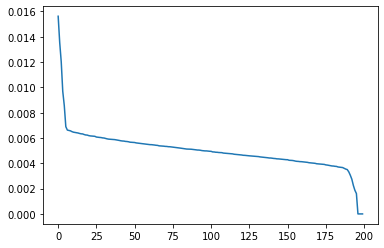

In [12]:
plt.plot(evr);

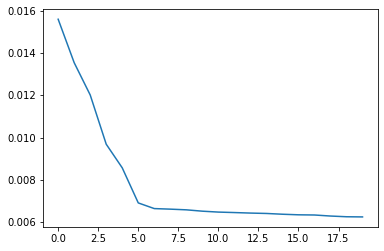

In [27]:
plt.plot(evr[:20]);

### Calculate Train and Test Error

#### Run the following:
- for the first 50 principal components,
  - scale the data
  - generate the number of principal components and transform them into features
  - Using Logistic Regression with default inputs, generate train and test predictions through 10-fold cross validation
    - *Hint:* use `sklearn.cross_validate`
    - *Level up:* ideally, you would scale and PCA on each training fold (why?).  Use a pipeline!
  - graph the means of the train and test predictions for each number of principal component

#### Interpret the graph  
- How many principle components should we choose based on this?
- Is overfitting or underfitting a problem?

#### Level up
- Repeat the above but don't scale the data.  Intepret the results.

In [ ]:
#Your work here
for i in range(1,51):
    ss = StandardScaler()
    scaled = ss.fit_transform(X_train)
    
    pca = PCA(n_components=i)
    pca_scaled = pca.fit_transform(X_train)
    
    lr = LogisticRegression(random_state=42)
    
    cross_validate(lr, pca_scaled, y_train)